<a href="https://colab.research.google.com/github/matyi101/price_catcher/blob/main/Price_Catcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/Colab Notebooks/price_catcher/"

from google.colab import data_table
data_table.enable_dataframe_formatter()

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
import glob

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["axes.grid"] = True

In [3]:
premise = pd.read_csv('https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.csv')
premise = premise.dropna()
premise.head()

,premise_code,premise,address,premise_type,state,district
1,2,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,3,JUSCO AYER KEROH,"LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...",Pasar Raya / Supermarket,Melaka,Melaka Tengah
3,6,KEDAI RUNCIT TAFAZ MAJU PRESINT 9,"NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
4,7,KEDAI RUNCIT SYAZ MAJU PRESINT 9,"NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
5,8,PASAR MINI D'MART PRESINT 8,"BLOK A T00/U01,JALAN P8/D,PRESINT 8, 62000 PUT...",Pasar Mini,W.P. Putrajaya,Wp Putrajaya


In [4]:
items = pd.read_csv('https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.csv')
items = items.dropna()
items.head()

,item_code,item,unit,item_group,item_category
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
5,10,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING


In [5]:



# Define the directory path where the data are located
directory_path = "/content/drive/MyDrive/Colab Notebooks/price_catcher/data/"

# Use glob to get a list of file names that match a pattern
file_names = glob.glob(directory_path + "*.csv")

# Create an empty list to store the data frames
data_frames = []

# Loop through the file names and read each file as a data frame
for file in file_names:
    # Read the file using pandas read_csv function
    df = pd.read_csv(file)
    # Append the data frame to the list
    data_frames.append(df)

# Use pandas concat function to combine the data frames into one
df = pd.concat(data_frames, ignore_index=True)
df.head()

,date,premise_code,item_code,price
0,2023-01-01,2,1,9.4
1,2023-01-01,2,9,36.0
2,2023-01-01,2,14,24.0
3,2023-01-01,2,16,4.5
4,2023-01-01,2,18,5.5


In [8]:
combine = df.merge(premise, on="premise_code", how="left")
combine.head()

,date,premise_code,item_code,price,premise,address,premise_type,state,district
0,2023-01-01,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
1,2023-01-01,2,9,36.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,2023-01-01,2,14,24.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
3,2023-01-01,2,16,4.5,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
4,2023-01-01,2,18,5.5,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta


In [10]:
df_combine = combine.merge(items, on="item_code", how="left")
df_combine

,date,premise_code,item_code,price,premise,address,premise_type,state,district,item,unit,item_group,item_category
0,2023-01-01,2,1,9.40,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
1,2023-01-01,2,9,36.00,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
2,2023-01-01,2,14,24.00,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,BARANGAN SEGAR,DAGING
3,2023-01-01,2,16,4.50,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,BETIK BIASA,1kg,BARANGAN SEGAR,BUAH-BUAHAN
4,2023-01-01,2,18,5.50,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,PISANG BERANGAN,1kg,BARANGAN SEGAR,BUAH-BUAHAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14565769,2023-07-06,20888,1938,13.30,BS FRESHMART MUADZAM SHAH,"217,218,219 & 220,JALAN MEDAN MEWAH,",Pasar Raya / Supermarket,Pahang,Rompin,MINYAK MASAK TULEN CAP SAJI,2 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
14565770,2023-07-06,20888,1939,30.90,BS FRESHMART MUADZAM SHAH,"217,218,219 & 220,JALAN MEDAN MEWAH,",Pasar Raya / Supermarket,Pahang,Rompin,MINYAK MASAK TULEN CAP SAJI,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
14565771,2023-07-06,20888,1941,13.30,BS FRESHMART MUADZAM SHAH,"217,218,219 & 220,JALAN MEDAN MEWAH,",Pasar Raya / Supermarket,Pahang,Rompin,MINYAK MASAK TULEN CAP ALIF,2 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
14565772,2023-07-06,20888,1944,5.99,BS FRESHMART MUADZAM SHAH,"217,218,219 & 220,JALAN MEDAN MEWAH,",Pasar Raya / Supermarket,Pahang,Rompin,KACANG SOYA (IMPORT),1kg,BARANGAN KERING,KACANG


In [16]:
df_reconstructed = df_combine[["date", "premise_type", "district","state","item","item_category","price"]]
df_reconstructed.head()

,date,premise_type,district,state,item,item_category,price
0,2023-01-01,Pasar Basah,Kinta,Perak,AYAM BERSIH - STANDARD,AYAM,9.4
1,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,DAGING,36.0
2,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),DAGING,24.0
3,2023-01-01,Pasar Basah,Kinta,Perak,BETIK BIASA,BUAH-BUAHAN,4.5
4,2023-01-01,Pasar Basah,Kinta,Perak,PISANG BERANGAN,BUAH-BUAHAN,5.5


In [19]:
df = df_reconstructed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14565774 entries, 0 to 14565773
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   premise_type   object 
 2   district       object 
 3   state          object 
 4   item           object 
 5   item_category  object 
 6   price          float64
dtypes: float64(1), object(6)
memory usage: 889.0+ MB


In [36]:
ayam_bersih_standard = df[df["item"]=="AYAM BERSIH - STANDARD"]
ayam_bersih_standard.head()

,date,premise_type,district,state,item,item_category,price
0,2023-01-01,Pasar Basah,Kinta,Perak,AYAM BERSIH - STANDARD,AYAM,9.40
893,2023-01-01,Pasar Raya / Supermarket,Kangar,Perlis,AYAM BERSIH - STANDARD,AYAM,9.40
1136,2023-01-01,Pasar Raya / Supermarket,Tampin,Negeri Sembilan,AYAM BERSIH - STANDARD,AYAM,9.40
1360,2023-01-01,Pasar Raya / Supermarket,Cheras,W.P. Kuala Lumpur,AYAM BERSIH - STANDARD,AYAM,9.40
1582,2023-01-01,Hypermarket,Cheras,W.P. Kuala Lumpur,AYAM BERSIH - STANDARD,AYAM,7.99


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Perak'),
  Text(1, 0, 'Perlis'),
  Text(2, 0, 'Negeri Sembilan'),
  Text(3, 0, 'W.P. Kuala Lumpur'),
  Text(4, 0, 'Selangor'),
  Text(5, 0, 'Kelantan'),
  Text(6, 0, 'Kedah'),
  Text(7, 0, 'Sarawak'),
  Text(8, 0, 'W.P. Putrajaya'),
  Text(9, 0, 'Johor'),
  Text(10, 0, 'W.P. Labuan'),
  Text(11, 0, 'Pahang'),
  Text(12, 0, 'Melaka'),
  Text(13, 0, 'Sabah'),
  Text(14, 0, 'Pulau Pinang'),
  Text(15, 0, 'Terengganu')])

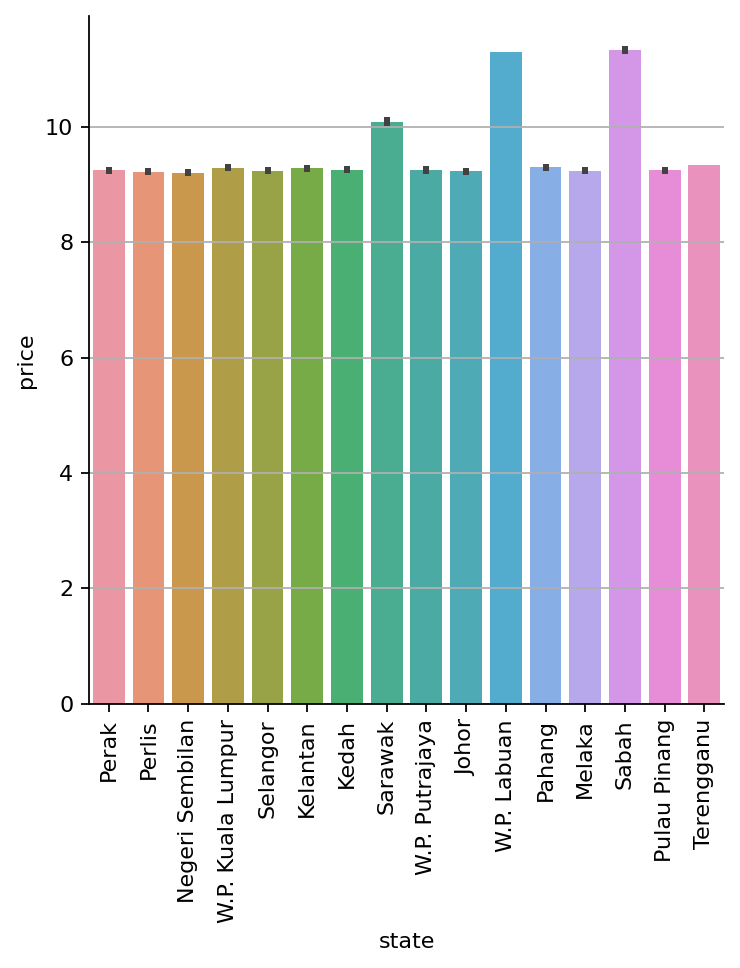

In [39]:
sns.catplot(x="state", y="price", data=ayam_bersih_standard, kind="bar")
plt.xticks(rotation=90)

<Axes: xlabel='state', ylabel='item'>

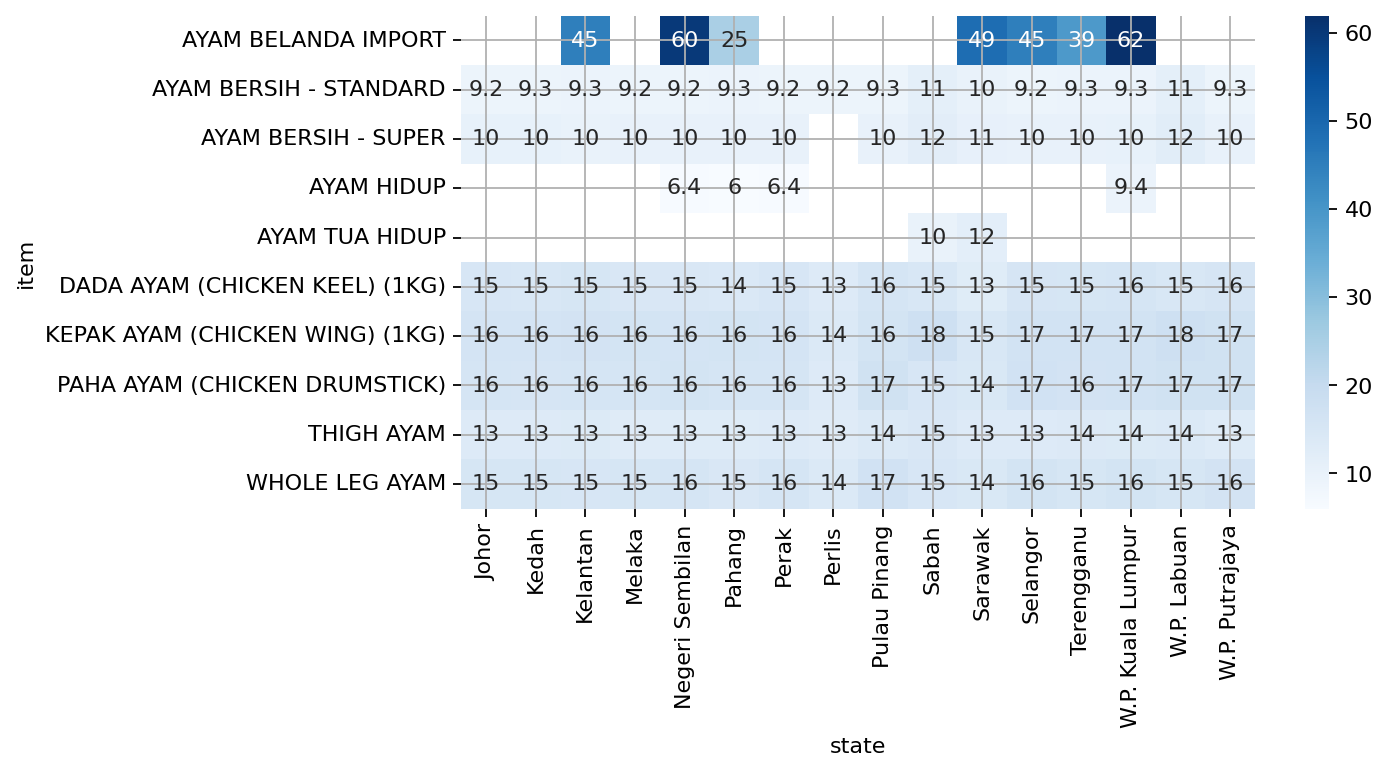

In [30]:
# Filter the data to keep only the rows where item is equal to ayam
df_ayam = df[df["item_category"]=="AYAM"]

# Reshape the data using pivot_table to have item as index, state as columns, and price as values
df_pivot = df_ayam.pivot_table(index="item", columns="state", values="price")

# Plot the heatmap using seaborn
sns.heatmap(df_pivot, annot=True, cmap="Blues")


In [33]:
df_group = df.groupby("item_category")
df_group.head()

,date,premise_type,district,state,item,item_category,price
0,2023-01-01,Pasar Basah,Kinta,Perak,AYAM BERSIH - STANDARD,AYAM,9.4
1,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,DAGING,36.0
2,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),DAGING,24.0
3,2023-01-01,Pasar Basah,Kinta,Perak,BETIK BIASA,BUAH-BUAHAN,4.5
4,2023-01-01,Pasar Basah,Kinta,Perak,PISANG BERANGAN,BUAH-BUAHAN,5.5
...,...,...,...,...,...,...,...
1307,2023-01-01,Pasar Raya / Supermarket,Tampin,Negeri Sembilan,CILI KERING KERINTING (BERTANGKAI/TIDAK BERTAN...,CILI KERING,27.0
1309,2023-01-01,Pasar Raya / Supermarket,Tampin,Negeri Sembilan,IKAN TILAPIA MERAH (ANTARA 2 HINGGA 5 EKOR SEK...,IKAN DARAT,15.0
1515,2023-01-01,Pasar Raya / Supermarket,Cheras,W.P. Kuala Lumpur,MENTEGA SCS (SALTED),MENTEGA,17.8
2094,2023-01-01,Pasar Basah,Tuaran,Sabah,KELAPA BIJI,KELAPA,2.0


In [41]:
daging = df[df["item_category"]=="DAGING"]
daging

,date,premise_type,district,state,item,item_category,price
1,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,DAGING,36.0
2,2023-01-01,Pasar Basah,Kinta,Perak,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),DAGING,24.0
86,2023-01-01,Pasar Basah,Kinta,Perak,DAGING PAHA KAMBING BEBIRI IMPORT BERTULANG (...,DAGING,42.0
87,2023-01-01,Pasar Basah,Kinta,Perak,DAGING BABI (PERUT / BELLY),DAGING,36.0
88,2023-01-01,Pasar Basah,Kinta,Perak,DAGING BABI (DAGING & LEMAK / LEAN & FAT),DAGING,26.0
...,...,...,...,...,...,...,...
14565651,2023-07-06,Pasar Basah,Kota Tinggi,Johor,DAGING KERBAU IMPORT (INDIA) * (CHUCK),DAGING,24.0
14565652,2023-07-06,Pasar Basah,Kota Tinggi,Johor,DAGING BABI (PERUT / BELLY),DAGING,46.0
14565653,2023-07-06,Pasar Basah,Kota Tinggi,Johor,DAGING BABI (DAGING & LEMAK / LEAN & FAT),DAGING,33.0
14565654,2023-07-06,Pasar Basah,Kota Tinggi,Johor,DAGING BABI (ISI DAGING / PURE LEAN),DAGING,35.0


In [46]:
daging.groupby("item").sum()

<ipython-input-46-f41974dcb809>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daging.groupby("item").sum()


,price
item,
BABI HIDUP (±100KG / SEEKOR),18590.00
DAGING BABI (DAGING & LEMAK / LEAN & FAT),444126.02
DAGING BABI (ISI DAGING / PURE LEAN),535289.14
DAGING BABI (PERUT / BELLY),820771.33
DAGING BABI (RUSUK DENGAN DAGING/ RIBS WITH MEAT),591629.85
DAGING KAMBING BEBIRI IMPORT BERTULANG (LAMB) (AUSTRALIA - KOTAK) (1KG),436188.59
DAGING KAMBING BEBIRI IMPORT BERTULANG (LAMB) (NEW ZEALAND - KOTAK),107314.08
DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (AUSTRALIA - KOTAK),737392.48
DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON) (NEW ZEALAND - KOTAK),70185.79
